In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chart_studio.plotly as pl
import plotly.graph_objs as gobj
import pandas as pd
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import missingno
import seaborn as sns
%matplotlib inline


In [2]:
df_in = pd.read_csv("test.csv")


In [3]:
df_in.head(10)


,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
5,1000006,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
6,1000007,Seoul,from other city,True,SMR Newly Planted Churches Group,36,-,-
7,1000008,Seoul,Dongdaemun-gu,True,Dongan Church,17,37.592888,127.056766
8,1000009,Seoul,from other city,True,Coupang Logistics Center,25,-,-
9,1000010,Seoul,Gwanak-gu,True,Wangsung Church,30,37.481735,126.930121


In [4]:
df_in.shape

(174, 8)

In [5]:
df_in.describe()


,case_id,confirmed
count,1.740000e+02,174.000000
mean,2.686216e+06,65.488506
std,1.943218e+06,355.097654
min,1.000001e+06,0.000000
25%,1.100006e+06,4.000000
50%,1.700004e+06,10.000000
75%,4.100004e+06,31.750000
max,7.000004e+06,4511.000000


In [6]:
df_in.columns


Index([' case_id', 'province', 'city', 'group', 'infection_case', 'confirmed',
       'latitude', 'longitude'],
      dtype='object')

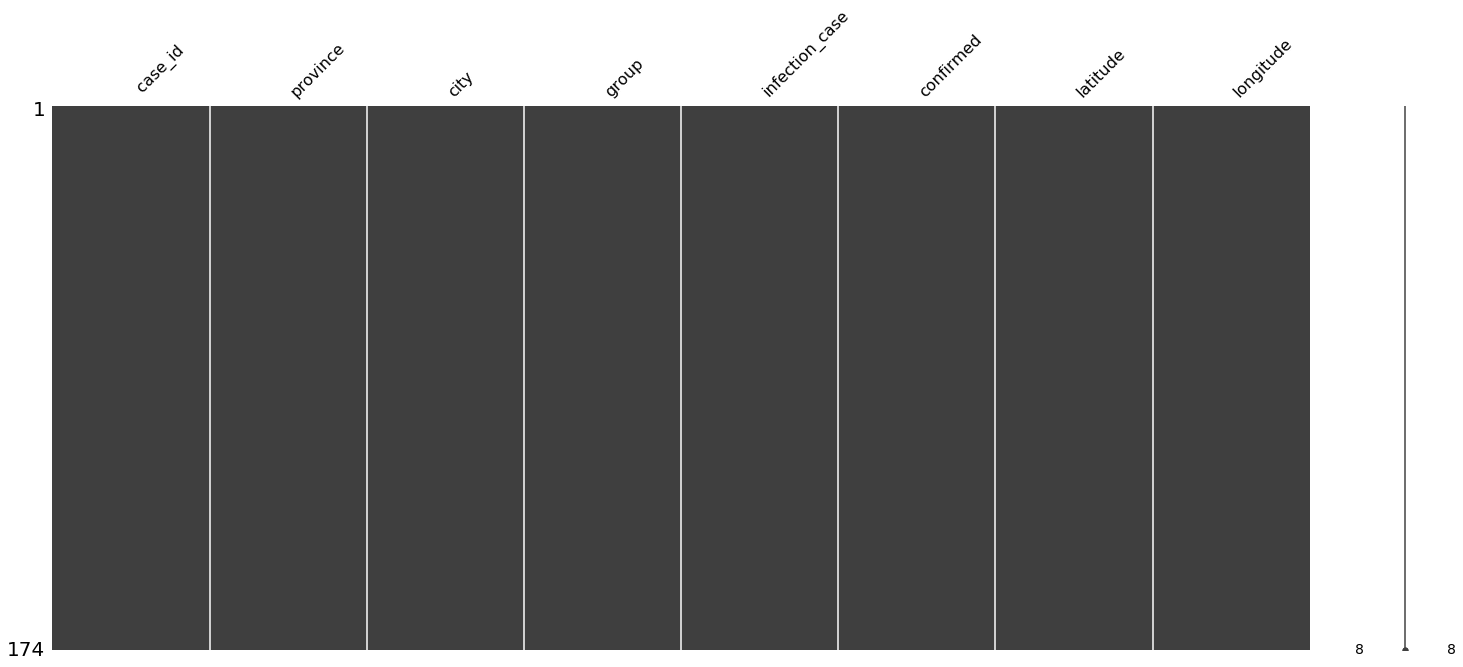

In [7]:
missingno.matrix(df_in)


In [8]:
df_in.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    case_id        174 non-null    int64 
 1   province        174 non-null    object
 2   city            174 non-null    object
 3   group           174 non-null    bool  
 4   infection_case  174 non-null    object
 5   confirmed       174 non-null    int64 
 6   latitude        174 non-null    object
 7   longitude       174 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 9.8+ KB


In [10]:
df_in['confirmed'].fillna((df_in['confirmed'].mean()), inplace = True)
df_yr = df_in.groupby('city')

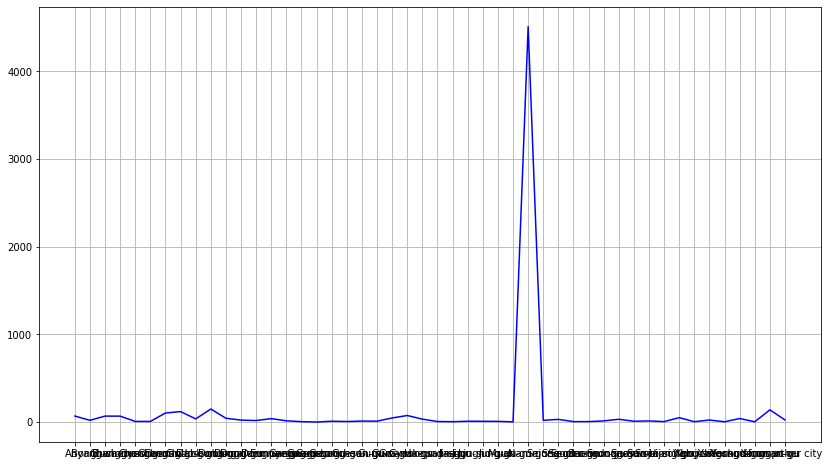

In [11]:
plt.figure(figsize=(14,8))
ap = sns.lineplot(data = df_yr.mean()['confirmed'], markers= True,color = "blue")
plt.grid()
plt.show()


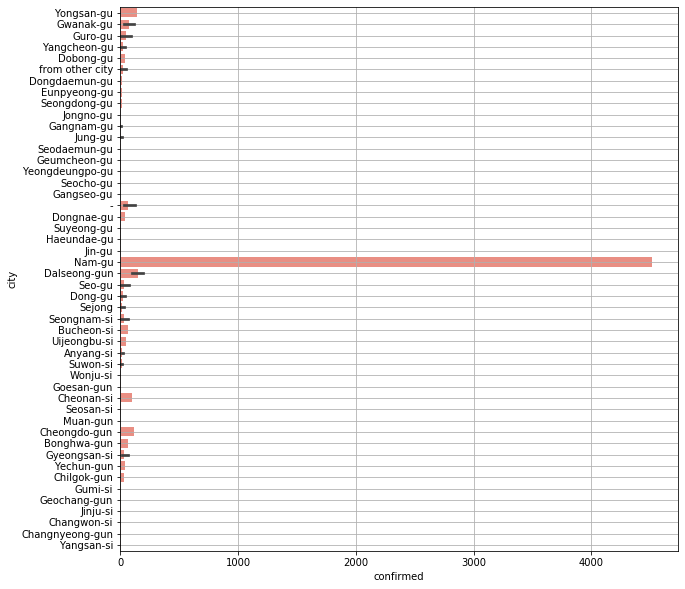

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(x="confirmed", y="city", data = df_in, color = "salmon")
plt.grid()

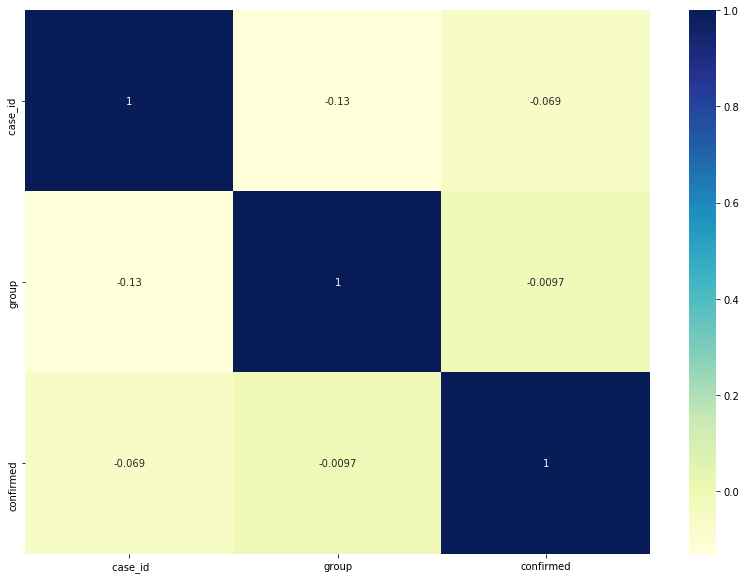

In [13]:

plt.figure(figsize=(14,10))
sns.heatmap(df_in.corr(),annot=True,cmap="YlGnBu")